In [1]:
import pandas as pd
import numpy as np
import tensorflow

import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import *
from keras.layers import *
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.optimizers import *

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data = pd.read_pickle('./foody_data.pkl')

In [3]:
data=pd.DataFrame(data)

In [4]:
data.head()

,time,user_name,user_link,brand_name,brand_link,review_content,review_link,avg_score,location_point,space_point,quality_point,service_point,price_point
0,14/9/2017 11:45,Sunny,https://www.foody.vn/thanh-vien/taiyo,El Sol - Meat & Wine - Võ Thị Sáu,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,Quán steak hiếm hoi mà mình cực kì ưng ý từ lâ...,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,8.6,7.0,10,9,9,8.0
1,14/9/2017 11:39,Nguyên Khánh,https://www.foody.vn/thanh-vien/viola_0309_tv,Busan Korean Food - Món Hàn Quốc - Đinh Tiên H...,https://www.foody.vn/ho-chi-minh/busan-korean-...,Vị trí dễ tìm. Giữ xe rất nhiệt tình. Dắt xe v...,https://www.foody.vn/ho-chi-minh/busan-korean-...,7.4,8.0,8,6,7,8.0
2,14/9/2017 11:34,Tú Hảo,https://www.foody.vn/thanh-vien/tuhao2509,TocoToco Bubble Tea - Cộng Hòa,https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,"Địa điểm quán dễ tìm. Không gian cũng rộng, có...",https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,6.4,7.0,8,7,7,3.0
3,14/9/2017 11:29,Vy Nhật,https://www.foody.vn/thanh-vien/zip_zilip,Le Castella Viet Nam - Bánh Bông Lan Đài Loan ...,https://www.foody.vn/ho-chi-minh/le-castella-v...,Thấy bánh này đang hot rần rần mình cũng gọi t...,https://www.foody.vn/ho-chi-minh/le-castella-v...,7.2,7.0,6,9,6,8.0
4,14/9/2017 11:26,Tien97,https://www.foody.vn/thanh-vien/tien97,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,10.0,10.0,10,10,10,10.0


In [5]:
data_review=pd.DataFrame(data["review_content"])
score=data["avg_score"]

In [6]:
score

0          8.6
1          7.4
2          6.4
3          7.2
4         10.0
5          7.2
6          8.0
7          8.2
8          8.8
9          8.4
10         9.0
11         6.0
12         7.0
13        10.0
14         7.0
15         6.4
16         8.6
17         8.8
18         5.0
19         8.0
20         6.0
21         9.0
22         7.8
23         9.4
24         9.2
25         7.6
26         8.8
27         1.4
28         6.4
29         1.6
          ... 
204359     7.6
204360     7.2
204361     7.0
204362     7.4
204363     7.0
204364     7.6
204365     8.8
204366     8.2
204367     7.4
204368     6.6
204369     3.8
204370     9.0
204371     6.6
204372     7.6
204373     6.4
204374     4.8
204375     8.2
204376     7.6
204377     7.0
204378     7.4
204379     4.0
204380     8.8
204381     7.8
204382     7.4
204383     7.4
204384     7.2
204385     7.4
204386     8.4
204387     8.4
204388     8.4
Name: avg_score, Length: 174437, dtype: float64

In [7]:
data_review.insert(1,"score",score)
data_review.head()

,review_content,score
0,Quán steak hiếm hoi mà mình cực kì ưng ý từ lâ...,8.6
1,Vị trí dễ tìm. Giữ xe rất nhiệt tình. Dắt xe v...,7.4
2,"Địa điểm quán dễ tìm. Không gian cũng rộng, có...",6.4
3,Thấy bánh này đang hot rần rần mình cũng gọi t...,7.2
4,Mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...,10.0


In [8]:
import re
import string
punc = string.punctuation
def str_clean(s):
    s1 =  " ".join(re.findall("[0-9a-zaáàảãạâấầẩẫậăắằẳẵặeéèẻẽẹêếềểễệiíìỉĩịoóòỏõọôốồổỗộơớờởỡợuúùủũụưứừửữựyýỳỷỹỵđ]+", s.lower()))
    return(s1)

In [9]:
reviews = data_review[['review_content', 'score']]
#Để cho đơn giản, giả định điểm số không nhỏ hơn 5 là tốt còn ngược lại là tệ
reviews['score'] = reviews['score'].apply(lambda x: 1 if x >= 5 else 0)
reviews['review_content'] = reviews['review_content'].apply(lambda x: str_clean(x))
#del data

In [10]:
reviews.head()

,review_content,score
0,quán steak hiếm hoi mà mình cực kì ưng ý từ lâ...,1
1,vị trí dễ tìm giữ xe rất nhiệt tình dắt xe vào...,1
2,địa điểm quán dễ tìm không gian cũng rộng có l...,1
3,thấy bánh này đang hot rần rần mình cũng gọi t...,1
4,mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...,1


In [42]:
# lấy một phần dữ liệu
review_truncate = reviews['review_content'][0:30000]
labels = reviews['score'][0:30000]

In [43]:
# corpus size
a = set()
for x in review_truncate:
    a.update(x.split())

# integer encode the documents
vocab_size = len(a)
encoded_docs = [one_hot(d, vocab_size) for d in review_truncate]

In [44]:
#kết quả có được khi one hot encode
review_truncate[11]

'thử cho biết chứ mình thấy mix tùm lum ăn không ngon được cái tàu hủ với nước dừa béo quán nhỏ thôi được 6 7cái bàn nhà mình đi 5 người mà xài hết 3 cái rồi ai đi đông nên cân nhắc nha vị trí dễ tìm cứ công viên thỏ trắng rồi thấy bánh sầu riêng durio là đi vô thôi'

In [45]:
print(encoded_docs[11])

[4224, 11892, 18292, 8277, 2893, 436, 8438, 16131, 13991, 12778, 429, 10249, 4421, 92, 11442, 12424, 12906, 15965, 13324, 9308, 2810, 9887, 1347, 4421, 15808, 15102, 15785, 9959, 2893, 16789, 14551, 14123, 10650, 7956, 11953, 9244, 92, 12190, 9507, 16789, 4278, 16995, 16993, 3704, 17312, 13838, 5069, 17471, 8274, 3515, 12242, 7134, 2052, 7177, 12190, 436, 5983, 17888, 110, 3588, 8386, 16789, 16281, 1347]


In [48]:
max_length = 100 #chỉ lấy 100 phần tử đầu
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

padded_docs[1]

array([ 3224,   436,  6850,  8386,  3135, 10129, 12166, 16427, 11573,
        2893,  5854, 10684, 12778,   311, 12778, 13061,  8386,  9495,
        6006, 12166,  2810,   297, 11953, 12190, 16427,  6259, 12166,
        2404,  3224,   311, 12778, 13258,  6850, 12624,  4017, 18273,
       12571, 10249,   429, 13853,  3323,  3752,  2810,  8567, 15681,
       11249,  7536, 14725,  4084, 17471, 12778,  2187, 15011,  9495,
        2893,   429, 10684,   800,   436,  9403, 14348,  8386,  9771,
        1431, 12607,  9495,   429,   436, 13838,  9495, 14245, 12778,
         429,  9439, 13178,  9454,  8386,   311, 12778, 12624,  4017,
       13331, 15011,  9495,  5028,  7134,  9425, 16444, 16154,  1479,
        1462,  4371, 12918,  3709,  3224, 12385,  4224,  1431,   311,
        8567], dtype=int32)

In [49]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=42)

In [93]:
review_input = keras.layers.Input(shape=[100],name='input')
review_embedding=keras.layers.Embedding(vocab_size , 16,input_length=max_length,name='Embedding')(review_input)
review_vec = keras.layers.Flatten(name='Flatten')(review_embedding)

dropout_1 = keras.layers.Dropout(0.2,name='Dropout-1')(review_vec)
dense1 = keras.layers.Dense(50,name='dense1',activation='relu')(dropout_1)

dropout_2=keras.layers.Dropout(0.2,name='Dropout-2')(dense1)
dense2=keras.layers.Dense(1,name='dense2',activation='sigmoid')(dropout_2)
#prod = keras.layers.merge.dot([movie_vec, user_vec],axes=-1,name='DotProduct')
model = keras.Model(review_input,dense2)
model.compile('adam', 'binary_crossentropy',metrics=['accuracy'])



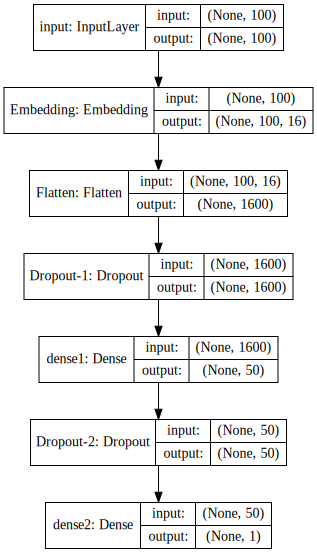

In [94]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 100)               0         
_________________________________________________________________
Embedding (Embedding)        (None, 100, 16)           294752    
_________________________________________________________________
Flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
Dropout-1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense1 (Dense)               (None, 50)                80050     
_________________________________________________________________
Dropout-2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense2 (Dense)               (None, 1)                 51        
Total para

In [96]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=20)

Train on 24000 samples, validate on 6000 samples
Epoch 1/5
24000/24000 [==============================] - 15s 610us/step - loss: 0.1477 - acc: 0.9546 - val_loss: 0.1269 - val_acc: 0.9592
Epoch 2/5
24000/24000 [==============================] - 14s 593us/step - loss: 0.0814 - acc: 0.9715 - val_loss: 0.1379 - val_acc: 0.9580
Epoch 3/5
24000/24000 [==============================] - 14s 596us/step - loss: 0.0375 - acc: 0.9868 - val_loss: 0.1830 - val_acc: 0.9547
Epoch 4/5
24000/24000 [==============================] - 14s 600us/step - loss: 0.0156 - acc: 0.9951 - val_loss: 0.2301 - val_acc: 0.9540
Epoch 5/5
24000/24000 [==============================] - 14s 589us/step - loss: 0.0090 - acc: 0.9972 - val_loss: 0.2800 - val_acc: 0.9502


In [97]:
model.predict(x_test,y_test)

TypeError: 'Series' object cannot be interpreted as an integer

In [92]:
pd.Series(history.history['accuracy']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

KeyError: 'accuracy'

In [50]:
'''
model = Sequential([
    Embedding(vocab_size, 16, input_length=max_length,name="embedding"), 
    Flatten(name="flatten"),
    Dropout(0.2,name="drop_out1"),
    Dense(50, activation='relu',name="dense1"),
    Dropout(0,2,name="drop_out2"),
    Dense(1, activation='sigmoid',name="dense2")])
'''

In [87]:
'''
model.compile( 'adam','binary_crossentropy', metrics=['accuracy'])
model.summary()
'''

"\nmodel.compile( 'adam','binary_crossentropy', metrics=['accuracy'])\nmodel.summary()\n"

In [69]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=20)

Train on 24000 samples, validate on 6000 samples
Epoch 1/5
24000/24000 [==============================] - 15s 607us/step - loss: 0.1447 - acc: 0.9561 - val_loss: 0.1230 - val_acc: 0.9583
Epoch 2/5
24000/24000 [==============================] - 14s 585us/step - loss: 0.0830 - acc: 0.9705 - val_loss: 0.1340 - val_acc: 0.9590
Epoch 3/5
24000/24000 [==============================] - 14s 581us/step - loss: 0.0396 - acc: 0.9862 - val_loss: 0.1799 - val_acc: 0.9567
Epoch 4/5
24000/24000 [==============================] - 14s 588us/step - loss: 0.0178 - acc: 0.9944 - val_loss: 0.2211 - val_acc: 0.9567
Epoch 5/5
24000/24000 [==============================] - 14s 593us/step - loss: 0.0095 - acc: 0.9974 - val_loss: 0.2690 - val_acc: 0.9573


In [70]:
import itertools
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    np.set_printoptions(precision=2)
    plt.figure()
    plt.show()

In [79]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      normalize=False,
                      title='confusion matrix')

AttributeError: 'Model' object has no attribute 'predict_classes'

In [ ]:
y_hat = np.round(model.predict(x_test),0)
y_true=test.rating

In [91]:
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length, mask_zero=True, dropout=0.2),
    LSTM(50), 
    Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/taibk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           370336    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 386,987
Trainable params: 386,987
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/2
8000/8000 [==============================] - 36s 5ms/step - loss: 0.0892 - acc: 0.9684 - val_loss: 0.1387 - val_acc: 0.9640
Epoch 2/2
8000/8000 [==============================] - 40s 5ms/step - loss: 0.0655 - acc: 0.9782 - val_loss: 0.1434 - val_acc: 0.9655


Confusion matrix, without normalization


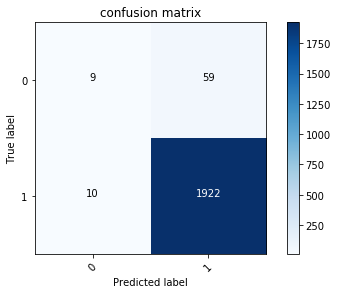

<Figure size 432x288 with 0 Axes>

In [94]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 
                      classes=['0', '1'],
                      normalize=False,
                      title='confusion matrix')